In [1]:
#!/usr/bin/env python
#
#  Author: Andreas Brotzer (2024)
# -------------------------------------------------------------------------

In [97]:
import os
import yaml
import matplotlib.pyplot as plt

from obspy import UTCDateTime
from pandas import read_csv


In [98]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [115]:
sta = "VROMY"

# tbeg = "2024-02-25"
# tend = "2024-02-28"

tbeg = "2023-09-08"
tend = "2023-09-09"

tbeg = "2024-03-29"
tend = "2024-03-29"

# data_path = "/home/andbro/kilauea-data/"

path_to_conf = data_path+"VelocityChanges/data/VROMY/sds/"

path = data_path+"VelocityChanges/data/VROMY/ROLODE/VROMY_HH/"

path_to_figs = data_path+"VelocityChanges/figures/"

name = f"{sta}_{UTCDateTime(tbeg).date}_{UTCDateTime(tend).date}"
print(name)

col_names = ["frequency", "mean", "std", "mode", "median"]


VROMY_2024-03-29_2024-03-29


In [116]:
# with open(path_to_conf+f"{name}_config.yml", 'r') as _file:
#     config = yaml.safe_load(_file)

In [117]:
df_love = read_csv(path+f"{name}-Love/"+"results.csv", delimiter=",", header=0, names=col_names)

df_rayl = read_csv(path+f"{name}-Rayleigh2/"+"results.csv", delimiter=",", header=0, names=col_names)


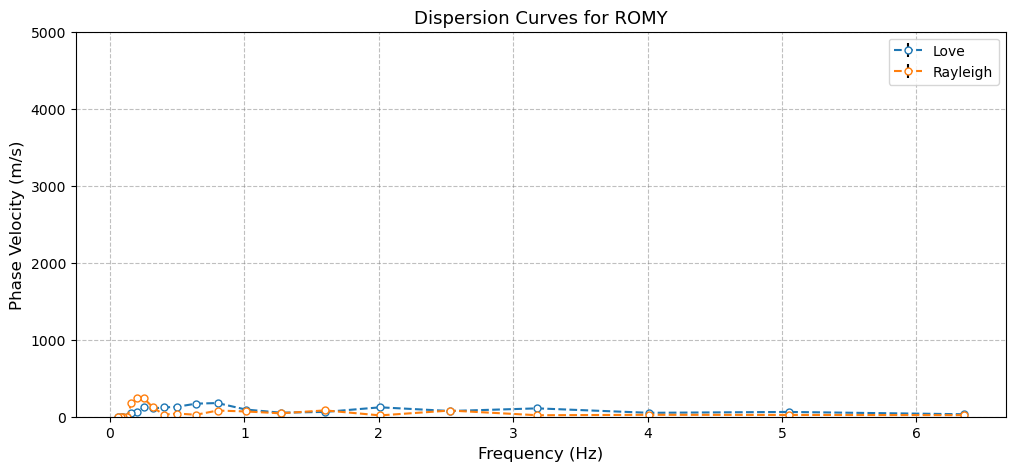

In [118]:
def __makeplot():

    import matplotlib.pyplot as plt

    Nrow, Ncol = 1, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 5), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    ax.errorbar(df_love['frequency'], abs(df_love['mean']), yerr=df_love['std'],
                ls="--", ms=5, marker="o", label="Love", ecolor="k", markerfacecolor="w")
    ax.errorbar(df_rayl['frequency'], abs(df_rayl['mean']), yerr=df_rayl['std'],
                ls="--", ms=5, marker="o", label="Rayleigh", ecolor="k", markerfacecolor="w")

    # ax.set_xscale("log")
    ax.set_ylim(0, 5000)

    # ax.set_ylim(0, 1.1*max(max(df_love['mean']), max(df_rayl['mean'])))

    ax.grid(which="both", ls="--", color="grey", alpha=0.5, zorder=0)

    ax.legend(loc=1)

    ax.set_ylabel("Phase Velocity (m/s)", fontsize=font)
    ax.set_xlabel("Frequency (Hz)", fontsize=font)
    ax.set_title("Dispersion Curves for ROMY", fontsize=font+1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(path_to_figs+f"Dispersion_{tbeg}_{tend}.png", format="png", dpi=150, bbox_inches='tight')
